In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("movies_cleaned.csv")

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month,day
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June,13
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July,2
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June,20
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July,2
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July,25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5407 non-null   object 
 1   rating    5407 non-null   object 
 2   genre     5407 non-null   object 
 3   year      5407 non-null   int64  
 4   released  5407 non-null   object 
 5   score     5407 non-null   float64
 6   votes     5407 non-null   float64
 7   director  5407 non-null   object 
 8   writer    5407 non-null   object 
 9   star      5407 non-null   object 
 10  country   5407 non-null   object 
 11  budget    5407 non-null   float64
 12  gross     5407 non-null   float64
 13  company   5407 non-null   object 
 14  runtime   5407 non-null   float64
 15  month     5407 non-null   object 
 16  day       5407 non-null   int64  
dtypes: float64(5), int64(2), object(10)
memory usage: 718.2+ KB


In [5]:
df.describe()

,year,score,votes,budget,gross,runtime,day
count,5407.000000,5407.000000,5.407000e+03,5.407000e+03,5.407000e+03,5407.000000,5407.000000
mean,2001.689846,6.393194,1.153467e+05,3.608856e+07,1.034955e+08,108.169595,16.102645
std,10.532659,0.962755,1.845629e+05,4.159678e+07,1.874721e+08,18.122898,8.489314
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000,1.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.085234e+07,95.000000,9.000000
50%,2002.000000,6.500000,5.200000e+04,2.200000e+07,3.729544e+07,105.000000,16.000000
75%,2011.000000,7.100000,1.300000e+05,4.500000e+07,1.130424e+08,118.000000,23.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000,31.000000


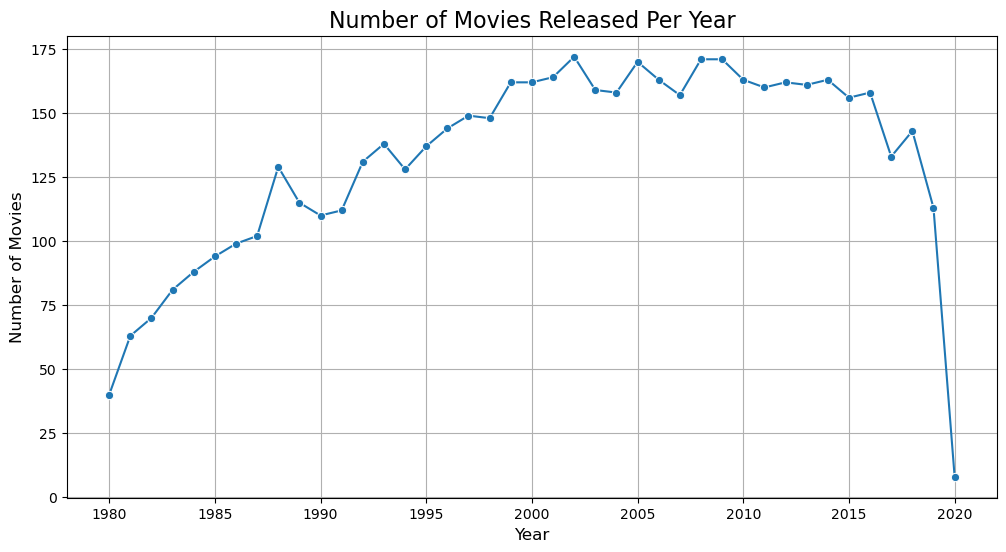

In [6]:
# 1. Movies released per year
movies_per_year = df['year'].value_counts().sort_index()

# Plot: Number of Movies Released per Year
plt.figure(figsize=(12, 6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, marker="o")
plt.title("Number of Movies Released Per Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.grid(True)
plt.show()

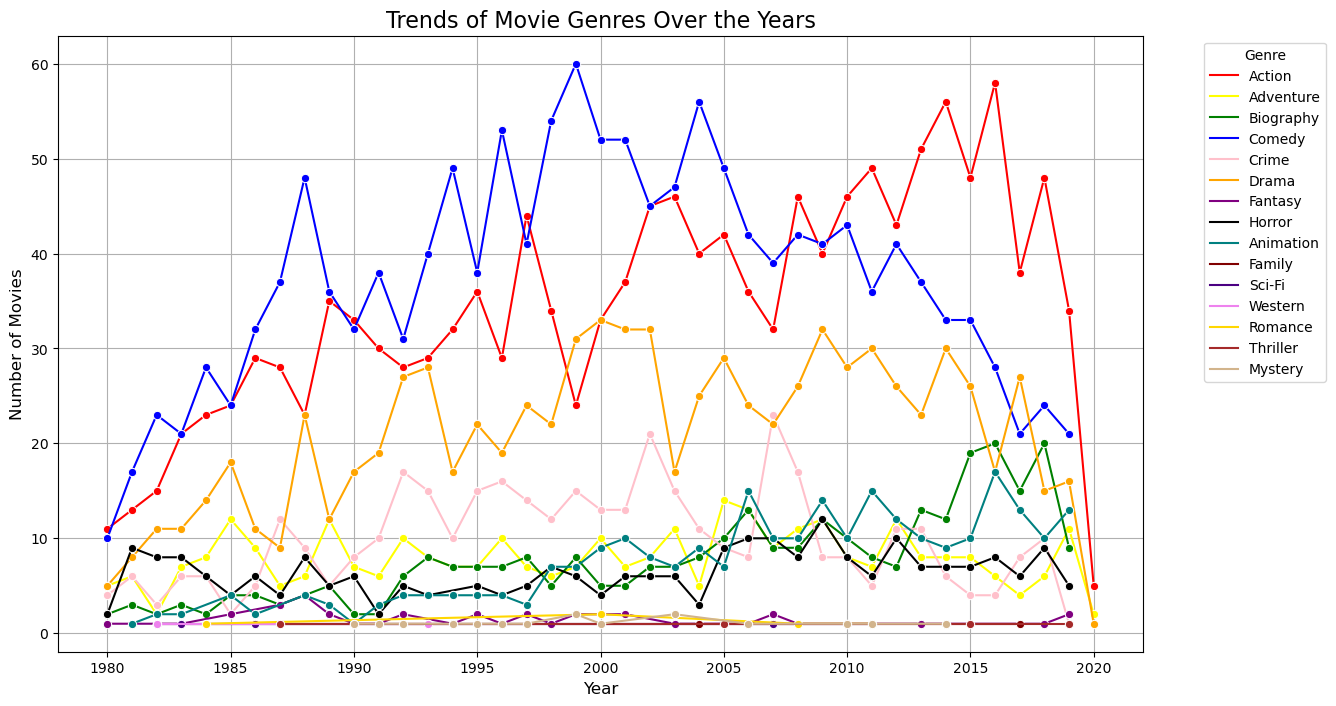

In [7]:
# 2. Grouping data by year and genre to count the number of movies in each genre per year
genre_trends = df.groupby(['year', 'genre']).size().reset_index(name='count')
colors = ["red", "yellow", "green", "blue", "pink", "orange", "purple", "black", "teal", "maroon", "indigo", "violet", "gold", "brown", "tan"]
# Plot: Genre Trends Over the Years
plt.figure(figsize=(14, 8))
sns.lineplot(data=genre_trends, x='year', y='count', hue='genre', marker="o", palette= colors)
plt.title("Trends of Movie Genres Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

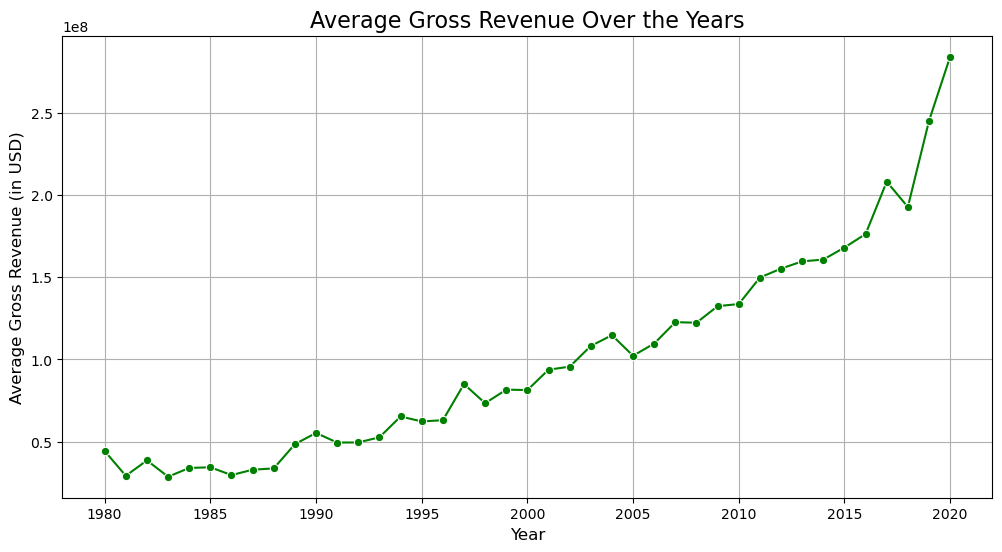

In [8]:
# 3. Handling missing values in 'gross' column
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')

# Calculate average gross revenue per year
average_gross_per_year = df.groupby('year')['gross'].mean().dropna()

# Plot: Average Gross Revenue Over the Years
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_gross_per_year.index, y=average_gross_per_year.values, marker="o", color="green")
plt.title("Average Gross Revenue Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Gross Revenue (in USD)", fontsize=12)
plt.grid(True)
plt.show()


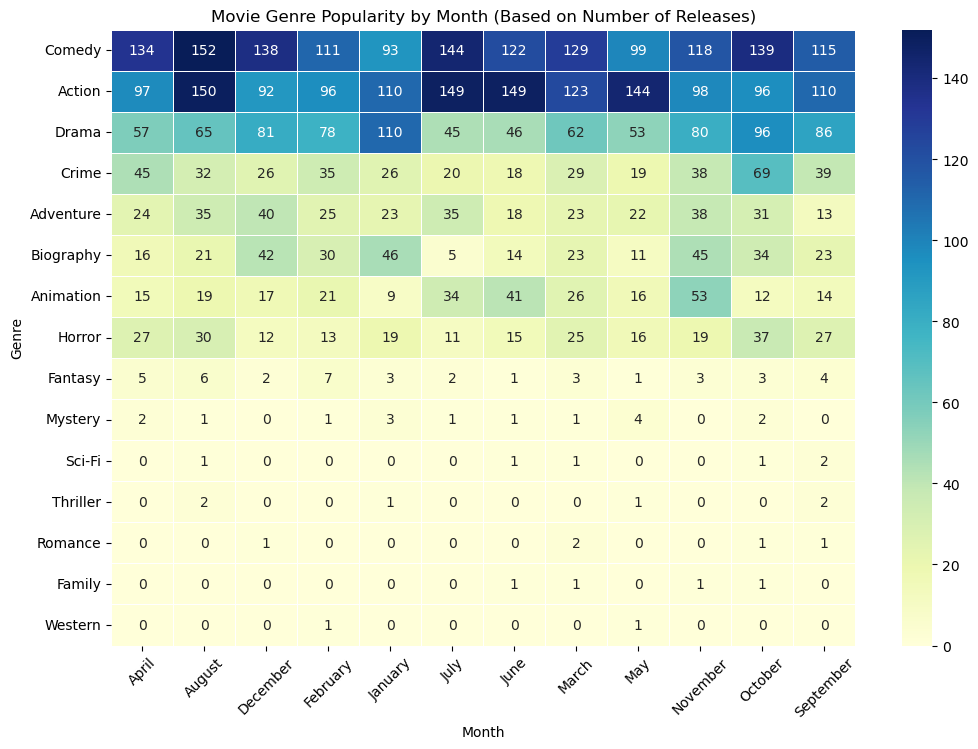

In [9]:


# Aggregate data: Count of movies per genre per month
genre_month_count = df.groupby(["month", "genre"]).size().reset_index(name="count")

# Pivot table for heatmap
heatmap_data = genre_month_count.pivot(index="genre", columns="month", values="count").fillna(0)

# Sort genres by total count for better readability
heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1).sort_values(ascending=False).index]

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, annot=True, fmt=".0f")

plt.title("Movie Genre Popularity by Month (Based on Number of Releases)")
plt.xlabel("Month")
plt.ylabel("Genre")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


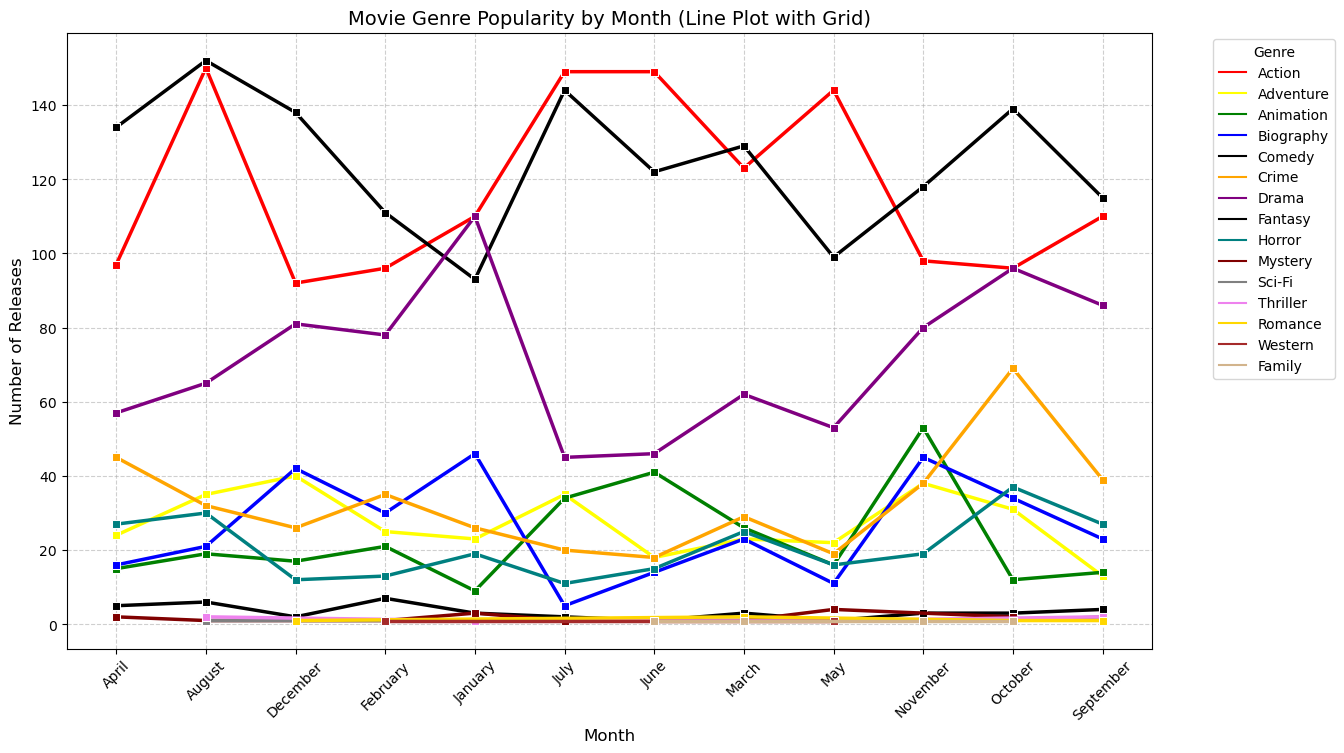

In [10]:
# Aggregate data: Count of movies per genre per month
genre_month_count = df.groupby(["month", "genre"]).size().reset_index(name="count")
colors = ["red", "yellow", "green", "blue", "black", "orange", "purple", "black", "teal", "maroon", "grey", "violet", "gold", "brown", "tan"]

# Create a line plot with a grid
plt.figure(figsize=(14, 8))
sns.lineplot(data=genre_month_count, x="month", y="count", hue="genre", marker="s", linewidth=2.5, palette=colors)

plt.title("Movie Genre Popularity by Month (Line Plot with Grid)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Releases", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Add grid lines
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()
